**Exploratory Data Analysis**

In [19]:
import polars as pl
import altair as alt

In [20]:
alt.renderers.enable('svg')

RendererRegistry.enable('svg')

In [21]:
# bike trips for 2024
recorridos_2024_path = r"data/recorridos_realizados_2024.csv"

In [22]:
ecobici2024_df = pl.read_csv(recorridos_2024_path, use_pyarrow=True, try_parse_dates=True)

In [23]:
ecobici2024_df.describe()

statistic,Id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,género
str,str,str,str,str,str,str,f64,f64,str,str,str,str,f64,f64,str,str,str
"""count""","""2935484""","""2935484""","""2935484""","""2935484""","""2935484""","""2935484""",2.935484e6,2.935484e6,"""2935484""","""2935484""","""2935484""","""2935484""",2.935484e6,2.935484e6,"""2935484""","""2935484""","""2935484"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""","""0"""
"""mean""",null,null,"""2024-06-22 08:13:00.812000""",null,null,null,-58.422416,-34.493167,"""2024-06-22 08:36:34.124000""",null,null,null,-58.422629,-34.490846,null,null,null
"""std""",null,null,null,null,null,null,0.038165,2.701151,null,null,null,null,0.038365,2.732879,null,null,null
"""min""","""20180969BAEcobici""","""1,000""","""2024-01-01 00:06:50""","""101BAEcobici""","""-CDO BARRACAS-""","""1019 Riglos""",-58.527098,-34.687767,"""2024-01-01 00:28:36""","""101BAEcobici""","""-- CDO Chacarita -- (Temporal)""","""1019 Riglos""",-58.527098,-34.687767,"""1000003BAEcobici""","""FIT""",""""""
"""25%""",null,null,"""2024-03-22 22:50:56""",null,null,null,-58.449299,-34.616354,"""2024-03-22 23:16:04""",null,null,null,-58.449379,-34.616488,null,null,null
"""50%""",null,null,"""2024-06-20 12:56:29""",null,null,null,-58.419816,-34.600752,"""2024-06-20 13:25:56""",null,null,null,-58.420621,-34.6008,null,null,null
"""75%""",null,null,"""2024-09-24 13:05:12""",null,null,null,-58.391768,-34.582963,"""2024-09-24 13:24:14""",null,null,null,-58.391768,-34.582547,null,null,null
"""max""","""24109859BAEcobici""","""999.0""","""2024-11-30 23:59:57""","""9BAEcobici""","""399 - GARCIA DEL RIO""","""o´higins 1327""",-58.355465,34.594547,"""2024-12-04 16:10:16""","""9BAEcobici""","""399 - GARCIA DEL RIO""","""o´higins 1327""",-58.355465,34.594547,"""999994BAEcobici""","""ICONIC""","""OTHER"""


In [24]:
#ecobici2024_df.dtypes

In [25]:
are_empty_dates = ecobici2024_df.filter(pl.col('fecha_origen_recorrido').is_null() | pl.col('fecha_destino_recorrido').is_null()).shape[0]
are_empty_dates

0

In [26]:
ecobici2024_df = ecobici2024_df.with_columns(
     pl.col('long_estacion_origen').alias('estacion_origen_lon'),
     pl.col('lat_estacion_origen').alias('estacion_origen_lat'),
     pl.col('long_estacion_destino').alias('estacion_destino_lon'),
     pl.col('lat_estacion_destino').alias('estacion_destino_lat')
)


In [27]:
ecobici2024_df = ecobici2024_df.with_columns(
    pl.col('fecha_origen_recorrido').dt.strftime("%B").alias("month"),
    pl.col('fecha_origen_recorrido').dt.strftime("%A").alias("day_name"),
    pl.col('fecha_origen_recorrido').dt.date().alias("date"),
    (pl.col('fecha_destino_recorrido') - pl.col('fecha_origen_recorrido')).dt.total_minutes().alias('trip_duration_minutes'),
    pl.col('fecha_origen_recorrido').dt.hour().alias('top_of_hour')
).with_columns(
    pl.when(pl.col('day_name').is_in(['Saturday', 'Sunday'])).then(1).otherwise(0).alias('is_weekend')
)

**Visualization**

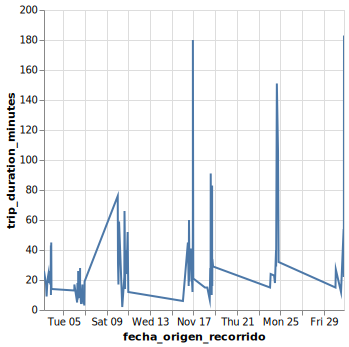

In [28]:
ecobici2024_df.limit(100).plot.line(x='fecha_origen_recorrido', y='trip_duration_minutes')

Trips by weekday

In [29]:
trips_by_day_df = ecobici2024_df.group_by("day_name").len(name='trip_count')
trips_by_day_df

day_name,trip_count
str,u32
"""Friday""",504052
"""Wednesday""",522080
"""Monday""",474357
"""Tuesday""",521663
"""Sunday""",184920
"""Saturday""",194820
"""Thursday""",533592


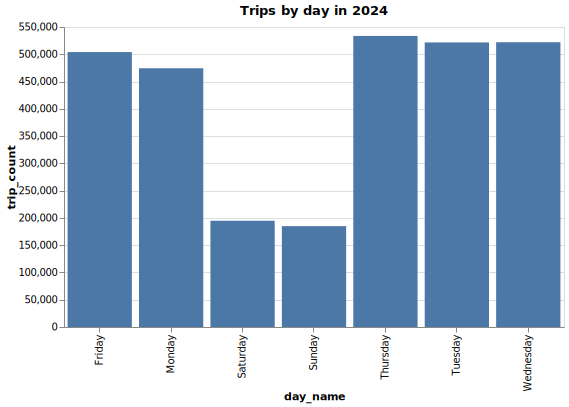

In [30]:
# Trips by day name
(
    alt.Chart(trips_by_day_df).mark_bar().encode(
        x="day_name",
        y="trip_count"
    ).properties(
        title="Trips by day in 2024",
        width=500
    )
).show()

Trips per day accross the year

In [31]:
trips_by_date_df = ecobici2024_df.group_by("date").len(name='trip_count_by_date')
len(trips_by_date_df)

335

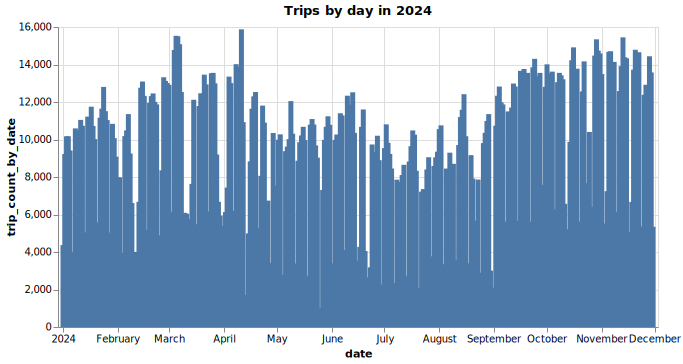

In [32]:
bar = alt.Chart(trips_by_date_df).mark_bar().encode(
        x="date",
        y="trip_count_by_date"
    ).properties(
        title="Trips by day in 2024",
        width=600
    )
bar.show()

Trips by hour

In [33]:
trips_by_hour_df = ecobici2024_df.group_by("top_of_hour").len(name='trip_count_by_hour')

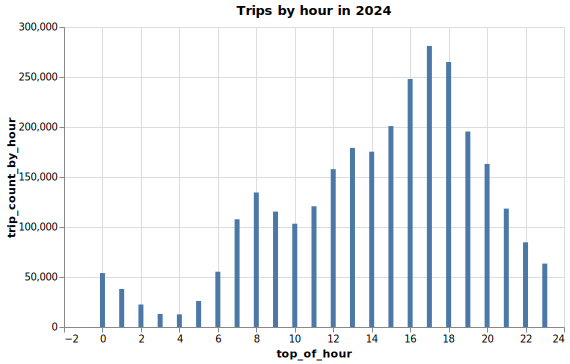

In [34]:
# Trips by day name
(
    alt.Chart(trips_by_hour_df).mark_bar().encode(
        x="top_of_hour",
        y="trip_count_by_hour"
    ).properties(
        title="Trips by hour in 2024",
        width=500
    )
).show()

Trips by gender and hour.

In [35]:
trips_by_gender_hour_df = ecobici2024_df.group_by(["género", 'top_of_hour']).agg(
    pl.count("top_of_hour").alias('trips_per_hour')
)


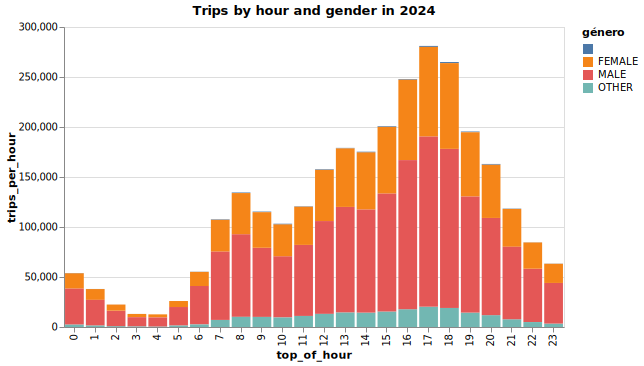

In [36]:
# Trips by day name
(
    alt.Chart(trips_by_gender_hour_df).mark_bar().encode(
        x="top_of_hour:O",
        y="trips_per_hour:Q",
        color='género:N'
    ).properties(
        title="Trips by hour and gender in 2024",
        width=500
    )
).show()